In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X = np.loadtxt("logisticX.csv", delimiter=",")
y = np.loadtxt("logisticY.csv", delimiter=",")

X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradient = (1 / m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

theta = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000

theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print("Final cost:", cost_history[-1])
print("Final coefficients:", theta)


Final cost: 0.22841635108662267
Final coefficients: [ 0.02854618  1.94027619 -1.90331374]


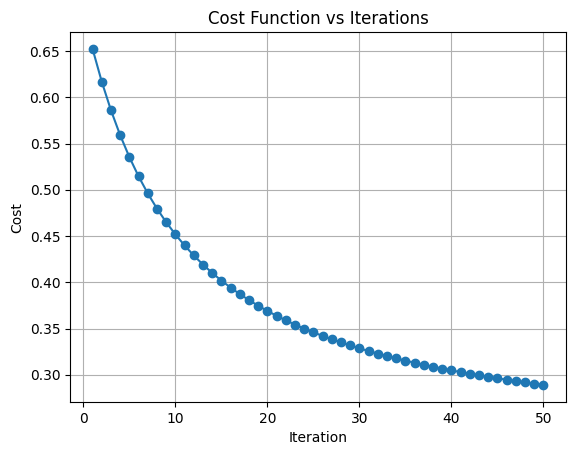

In [7]:
plt.figure()
plt.plot(range(1, 51), cost_history[:50], marker='o')
plt.title("Cost Function vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()

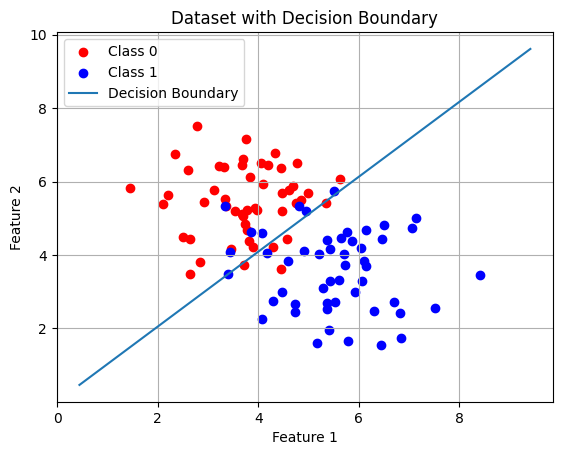

In [8]:
def plot_decision_boundary(X, y, theta):
    plt.figure()
    plt.scatter(X[y == 0, 1], X[y == 0, 2], c='red', label='Class 0')
    plt.scatter(X[y == 1, 1], X[y == 1, 2], c='blue', label='Class 1')

    x_values = [min(X[:, 1]) - 1, max(X[:, 1]) + 1]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary')

    plt.title("Dataset with Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid()
    plt.show()

plot_decision_boundary(X, y, theta)


/var/folders/9x/5yvhv8rx5lv9k9mrl5yb0y2w0000gn/T/ipykernel_2602/358696070.py:20: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
/var/folders/9x/5yvhv8rx5lv9k9mrl5yb0y2w0000gn/T/ipykernel_2602/358696070.py:20: RuntimeWarning: invalid value encountered in matmul
  return (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))


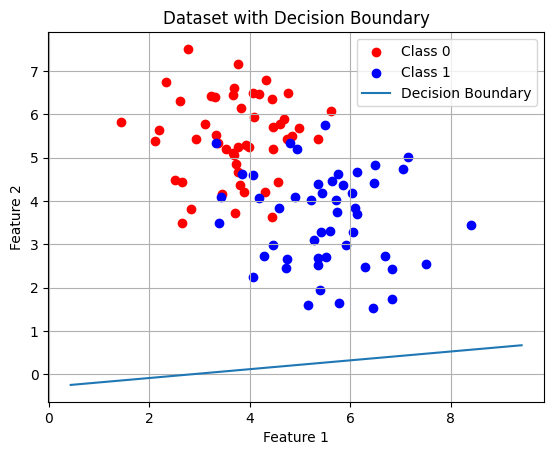

In [9]:
X_new = np.hstack((X, X[:, 1:3]**2))

theta_new = np.zeros(X_new.shape[1])

theta_new, cost_history_new = gradient_descent(X_new, y, theta_new, learning_rate, iterations)

plot_decision_boundary(X_new, y, theta_new)


In [10]:
y_pred = sigmoid(X @ theta) >= 0.5

conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
 [[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.865979381443299
